<a href="https://colab.research.google.com/github/Saranyanv/data-go/blob/master/Reducing%20Commercial%20Aviation%20Fatalities/Reducing%20Commercial%20Aviation%20Fatalities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**REDUCING COMMERCIAL AVIATION FATALITIES** (Work in Progress)

*https://www.kaggle.com/c/reducing-commercial-aviation-fatalities/data*

In [0]:
import os 
import numpy as np
import zipfile
from tqdm import tqdm
from matplotlib import pyplot as plt
from pandas import DataFrame
import pandas as pd
import seaborn as sns
RANDOM_SEED = 42

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls -l "drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities"

total 3416038
-rw------- 1 root root   43252727 May  1  2019 sample_submission.csv.zip
-rw------- 1 root root 1770171220 May  1  2019 test.csv.zip
-rw------- 1 root root 1234764001 Oct 10 03:56 train.csv
-rw------- 1 root root  449629430 May  9  2019 train.csv.zip
-rw------- 1 root root     204157 Feb  8 22:08 xgb_wip_model.sav


In [0]:
!unzip "drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities/train.csv.zip"

Archive:  drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities/train.csv.zip
  inflating: train.csv               


In [0]:
!unzip "drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities/sample_submission.csv.zip"

Archive:  drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities/sample_submission.csv.zip
  inflating: sample_submission.csv   


In [0]:
!unzip "drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities/test.csv.zip"

Archive:  drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities/test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                


In [4]:
!ls -lrt "drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities"

total 3416038
-rw------- 1 root root   43252727 May  1  2019 sample_submission.csv.zip
-rw------- 1 root root 1770171220 May  1  2019 test.csv.zip
-rw------- 1 root root  449629430 May  9  2019 train.csv.zip
-rw------- 1 root root 1234764001 Oct 10 03:56 train.csv
-rw------- 1 root root     204157 Feb  8 22:08 xgb_wip_model.sav


In [0]:
#train_df = pd.read_csv('train.csv', delim_whitespace=False, names=('id', 'crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event'))
train_df = pd.read_csv('drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities/train.csv', header=0, dtype={'crew': np.int32, 'experiment' :str, 'time': np.float64, 'seat': np.int32, 'eeg_fp1': np.float64, 'eeg_f7': np.float64, 'eeg_f8': np.float64, 'eeg_t4': np.float64, 'eeg_t6': np.float64, 'eeg_t5': np.float64, 'eeg_t3': np.float64, 'eeg_fp2': np.float64, 'eeg_o1': np.float64, 'eeg_p3': np.float64, 'eeg_pz': np.float64, 'eeg_f3': np.float64, 'eeg_fz': np.float64, 'eeg_f4': np.float64, 'eeg_c4': np.float64, 'eeg_p4': np.float64, 'eeg_poz': np.float64, 'eeg_c3': np.float64, 'eeg_cz': np.float64, 'eeg_o2': np.float64, 'ecg': np.float64, 'r': np.float64, 'gsr': str, 'event': str})

In [0]:
test_df = pd.read_csv('test.csv', header=0, dtype={'id': np.int32, 'crew': np.int32, 'experiment' :str, 'time': np.float64, 'seat': np.int32, 'eeg_fp1': np.float64, 'eeg_f7': np.float64, 'eeg_f8': np.float64, 'eeg_t4': np.float64, 'eeg_t6': np.float64, 'eeg_t5': np.float64, 'eeg_t3': np.float64, 'eeg_fp2': np.float64, 'eeg_o1': np.float64, 'eeg_p3': np.float64, 'eeg_pz': np.float64, 'eeg_f3': np.float64, 'eeg_fz': np.float64, 'eeg_f4': np.float64, 'eeg_c4': np.float64, 'eeg_p4': np.float64, 'eeg_poz': np.float64, 'eeg_c3': np.float64, 'eeg_cz': np.float64, 'eeg_o2': np.float64, 'ecg': np.float64, 'r': np.float64, 'gsr': str, 'event': str})

In [6]:
print (train_df.shape) 

(4867421, 28)


In [0]:
train_df.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,23.712299,-6.695870,29.232100,24.842899,3.92134,18.447001,1.07547,3.09029,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,21.010300,-6.474720,26.641399,24.138800,5.46991,20.510599,2.83354,7.10177,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,25.431801,-0.088707,28.119900,26.891300,8.57886,23.162901,4.51993,12.70550,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,19.142799,-0.256516,30.653601,24.247000,8.64310,19.961901,7.27575,11.45980,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,20.572100,-1.953470,31.722601,25.155500,12.50030,18.746901,7.30976,8.00805,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


In [0]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [0]:
train_df.crew.value_counts()

6     552958
4     552881
2     552868
5     552815
3     552795
7     552769
13    552724
8     549959
1     447652
Name: crew, dtype: int64

In [0]:
#train_df['experiment_DA'] = 0
#train_df.loc[train_df['experiment'].isin(['DA']), 'experiment_DA'] = 1

#train_df['experiment_CA'] = 0
#train_df.loc[train_df['experiment'].isin(['CA']), 'experiment_CA'] = 1

#train_df['experiment_SS'] = 0
#train_df.loc[train_df['experiment'].isin(['SS']), 'experiment_SS'] = 1

In [0]:
#train_df['crew'] = train_df['crew'].apply({'1': 'crew_1', '2': 'crew_2', '3': 'crew_3', '4': 'crew_4', '5': 'crew_5'
#                                        , '6': 'crew_6', '7': 'crew_7', '8': 'crew_8', '13': 'crew_13'}.get)

In [0]:
class_variance=train_df.groupby('event').agg({'eeg_fp1': np.var, 'eeg_f7': np.var, 'eeg_f8': np.var, 'eeg_t4': np.var, 'eeg_t6': np.var, 'eeg_t5': np.var, 'eeg_t3': np.var
, 'eeg_fp2': np.var, 'eeg_o1': np.var, 'eeg_p3': np.var, 'eeg_pz': np.var, 'eeg_f3': np.var, 'eeg_fz': np.var, 'eeg_f4': np.var
, 'eeg_c4': np.var, 'eeg_p4': np.var, 'eeg_poz': np.var, 'eeg_c3': np.var, 'eeg_cz': np.var, 'eeg_o2': np.var, 'ecg': np.var, 'r': np.var})

In [0]:
class_variance

,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r
event,,,,,,,,,,,,,,,,,,,,,,
A,2558.376805,1659.027471,1745.998022,786.344336,372.836354,427.710878,859.745715,2659.703078,1209.932392,338.024412,5453.540024,2422.062308,4753.726891,2296.383872,523.930593,338.407485,449.196670,483.359611,452.667918,818.011390,1.391762e+08,6748.073460
B,5324.425947,2716.481836,1102.471025,446.148131,339.792707,258.641433,466.286589,5616.848580,481.718383,232.318824,15611.257559,3369.033492,2436.074137,1502.794150,485.897660,280.688936,238.999345,473.871977,369.245890,522.909598,1.300606e+08,6204.592809
C,941.973080,477.657898,411.268880,294.099871,252.973207,191.631516,317.920754,993.221244,159.186105,167.151634,1375.908366,810.266898,361.195344,993.030355,241.632850,165.183190,155.534704,223.476354,267.065408,140.930385,1.607416e+08,6593.171936
D,1431.137580,659.158884,977.814432,395.949915,252.151568,279.324399,351.768637,1742.181717,269.083880,292.251709,660.955346,1076.215143,709.077280,972.068536,400.496658,288.348257,292.676587,388.780261,505.624664,257.844212,1.502554e+08,7227.803104


In [0]:
train_df.iloc[300000:450000].groupby('event').agg({'time': np.max})

,time
event,
A,359.890625
B,97.339844
C,101.630005
D,359.847656


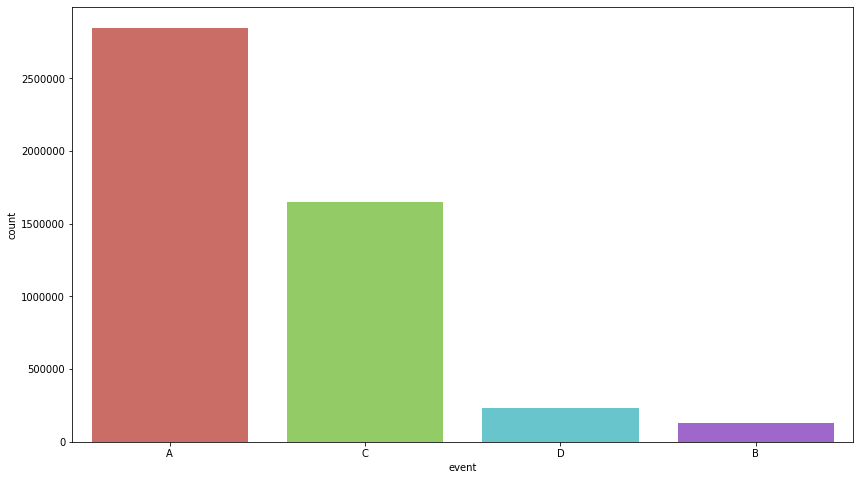

In [7]:
#Class Imbalance
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x='event', data=train_df, palette='hls')

In [0]:
train_df.isnull().sum().sum()

0

In [0]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size 
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [0]:
import matplotlib.pyplot as plt
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [0]:
keepers = ['crew', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r']

X_train, X_test, y_train, y_test = train_test_split(train_df[keepers], train_df['event'], test_size=0.2, random_state=42
                                                    ,stratify=train_df['event'])

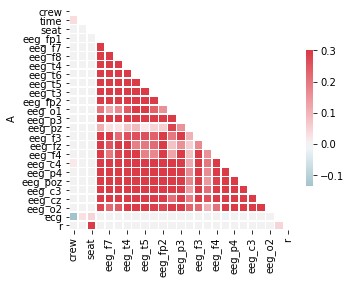

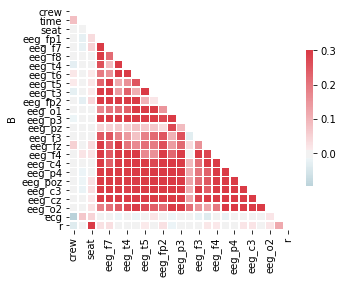

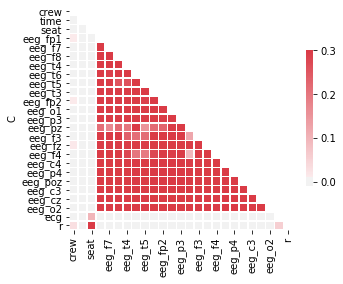

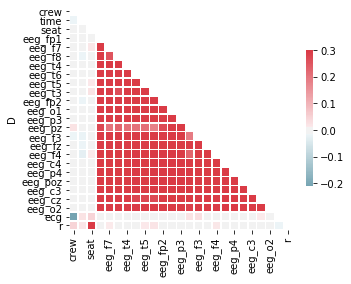

In [10]:
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(2,2,figsize=(12, 12))
#fig = plt.figure(figsize=(12, 12))


i=0
axss=['ax1','ax2','ax3','ax4']
for lbl in ['A','B','C','D']:
  corr = train_df[train_df['event']==lbl].corr()
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
  fig, axss[i] = plt.subplots(figsize=(5,5))
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
  axss[i].set_ylabel(lbl)
  i+=1
plt.show()

In [0]:
train_df.groupby('event')['gsr'].count()

event
A    2848809
B     130597
C    1652686
D     235329
Name: gsr, dtype: int64

**Data Prep For ML Pipeline (One-Hot Vectors For Categorical Variables, and Scaled Continuous Variables)**


In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [0]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

# Columns to delete or fix: earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d, verification_status_joint

num_cols=['time', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4','eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz',
       'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r']
cat_cols=['crew', 'seat']

#numeric = X_train.select_dtypes(exclude=["object"])
#categorical = X_train.select_dtypes(["object"])
numeric = X_train[num_cols]
categorical = X_train[cat_cols]

numeric_pipeline = Pipeline([
    ('selector', DataFrameSelector(numeric.columns.tolist())),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(categorical.columns.tolist())), # We will have to write the categorical columns manually and see if it works.
    ('encoder', CategoricalEncoder(encoding="onehot-dense")),
])

# Combine both Pipelines into one array
combined_pipeline = FeatureUnion(transformer_list=[
    ('numeric_pipeline', numeric_pipeline),
    ('categorical_pipeline', categorical_pipeline)
])

In [0]:
import gc
gc.collect()
X_train = combined_pipeline.fit_transform(X_train)

In [0]:
X_test = combined_pipeline.transform(X_test)

In [0]:
type(y_train)

pandas.core.series.Series

In [15]:
y_train.isnull().sum()

0

In [0]:
print (y_train_subset.isnull().sum(), len(y_train_subset))

622942 3115148


In [0]:
print (X_train.shape, X_test.shape)

(3893936, 34) (973485, 25)


In [0]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [0]:
#rand_clf1 = GradientBoostingClassifier(n_estimators=50, max_features='auto', random_state=42, learning_rate=0.05)
rand_clf1 = XGBClassifier(max_depth=4, verbosity=1, objective='multi:softmax', booster='gbtree'
                          , n_estimators=50, reg_alpha=1, random_state=42, learning_rate=0.10)

In [25]:
for train_index, test_index in cv.split(X_train[1:100000], y_train[1:100000]):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train_subset, X_test_subset = X_train[train_index], X_train[test_index]
  y_train_subset, y_test_subset = y_train.iloc[train_index], y_train.iloc[test_index]
  rand_clf1.fit(X_train_subset, y_train_subset)
  #scr=rand_clf1.score(X_test, y_test, sample_weight=None)
  acc_scr=accuracy_score(y_test_subset, rand_clf1.predict(X_test_subset), normalize=False)
  print (len(train_index), len(test_index), acc_scr)
  #print (rand_clf.predict(X_test))

79999 20000 15907
79999 20000 15752
79999 20000 16326
79999 20000 16078
79999 20000 16145


In [0]:
df=pd.DataFrame(rand_clf1.predict(X_test_subset),columns=['AB'])

In [0]:
# Pickling the model file to be used later
import pickle
filename = 'drive/My Drive/MyWork/Kaggle/Reducing Commercial Aviation Fatalities/xgb_wip_model.sav'
pickle.dump(rand_clf1, open(filename, 'wb'))
#rand_clf1 = pickle.load(open(filename, 'rb'))

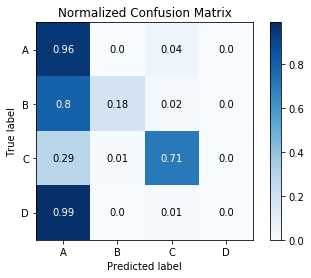

In [44]:
#print (confusion_matrix(y_test, rand_clf1.predict(X_test), labels=['A','B','C','D']))
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, rand_clf1.predict(X_test), normalize=True, labels=['A','B','C','D'])
plt.show()

**Handling class imbalance**


In [0]:
from imblearn.oversampling import SMOTE
smote=SMOTE('minority')

In [0]:
print (accuracy_score(y_test, rand_clf1.predict(X_test)))

0.7224713272418167


In [0]:
print(rand_clf1.feature_importances_)

[1.6292728e-01 1.1494128e-01 0.0000000e+00 4.6200119e-03 4.8600566e-03
 1.7868599e-02 1.2241751e-05 0.0000000e+00 1.1655538e-04 1.4042575e-02
 4.8877921e-02 1.0057974e-04 0.0000000e+00 4.8301283e-02 4.7297510e-03
 0.0000000e+00 1.5767103e-02 2.1130396e-02 0.0000000e+00 4.1443560e-05
 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.8164905e-01 2.6001391e-01]


In [0]:
feature_names = [x for i,x in enumerate(X_train.columns) if i!=28]

def plot_feature_importances(model):
    plt.figure(figsize=(14,6))
    n_features = 25
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

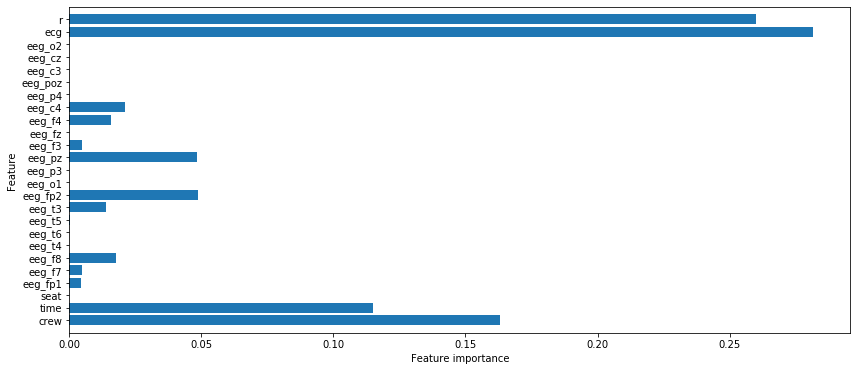

In [0]:
plot_feature_importances(rand_clf1)

In [0]:
train_df['event'].value_counts()

A    2848809
C    1652686
D     235329
B     130597
Name: event, dtype: int64

Text(0, 0.5, '')

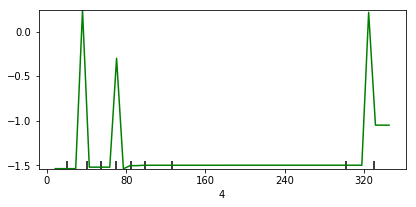

In [0]:
#plot_partial_dependence(rand_clf1, 
#                               #features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27],
#                               features=[4],
#                               X=X_train,
#                               #feature_names=['crew', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r'],
#                               #feature_names=['time'],
#                               n_jobs=3, 
#                               grid_resolution=50,
#                               label='D'
#                              )
#plt.ylabel('')

In [0]:
keepers=['r','ecg','eeg_c4','eeg_f4','eeg_f3','eeg_pz','eeg_fp2','eeg_t3','eeg_f8','eeg_f7','eeg_fp1','time']

In [0]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

# Columns to delete or fix: earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d, verification_status_joint

num_cols=keepers
cat_cols=['crew', 'seat']

#numeric = X_train.select_dtypes(exclude=["object"])
#categorical = X_train.select_dtypes(["object"])
numeric = X_train[num_cols]
categorical = X_train[cat_cols]

numeric_pipeline = Pipeline([
    ('selector', DataFrameSelector(numeric.columns.tolist())),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(categorical.columns.tolist())), # We will have to write the categorical columns manually and see if it works.
    ('encoder', CategoricalEncoder(encoding="onehot-dense")),
])

# Combine both Pipelines into one array
combined_pipeline = FeatureUnion(transformer_list=[
    ('numeric_pipeline', numeric_pipeline),
    ('categorical_pipeline', categorical_pipeline)
])